# Second assignment - Supervised Learning

## NASA Asteroids Classification 

The asteroid classification dataset contains information that helps determine whether an asteroid poses a threat to Earth. This dataset includes repeated entries for certain parameters, as each unit of length is represented in various metrics. In our supervised learning case study, we believe the following data will significantly influence the results and assist us in determining the potential hazard of an asteroid.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math 
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, KFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import AllKNN

#### Create dataframe from dataset of the csv file

In [2]:
df = pd.read_csv("archive/nasa.csv")

For convenience we decided to transform the "Hazardous" column from true's and false's to 0's and 1's.

In [3]:
encoder = LabelEncoder()

df['Hazardous'] = encoder.fit_transform(df['Hazardous'])

First rows of the dataframe:

In [4]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,1
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,0
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,1
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,0
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,1


### Data preprocessing

We started by checking if there was any columns with a single unique value:

In [6]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Neo Reference ID: 3692
Name: 3692
Absolute Magnitude: 269
Est Dia in KM(min): 269
Est Dia in KM(max): 269
Est Dia in M(min): 269
Est Dia in M(max): 269
Est Dia in Miles(min): 269
Est Dia in Miles(max): 269
Est Dia in Feet(min): 269
Est Dia in Feet(max): 269
Close Approach Date: 777
Epoch Date Close Approach: 777
Relative Velocity km per sec: 4687
Relative Velocity km per hr: 4687
Miles per hour: 4687
Miss Dist.(Astronomical): 4673
Miss Dist.(lunar): 4660
Miss Dist.(kilometers): 4661
Miss Dist.(miles): 4660
Orbiting Body: 1
Orbit ID: 188
Orbit Determination Date: 2680
Orbit Uncertainity: 10
Minimum Orbit Intersection: 3678
Jupiter Tisserand Invariant: 2495
Epoch Osculation: 429
Eccentricity: 3692
Semi Major Axis: 3692
Inclination: 3692
Asc Node Longitude: 3692
Orbital Period: 3692
Perihelion Distance: 3692
Perihelion Arg: 3692
Aphelion Dist: 3692
Perihelion Time: 3692
Mean Anomaly: 3692
Mean Motion: 3692
Equinox: 1
Hazardous: 2


As we can see, both the "Equinox" and "Orbiting Body" have only one single unique value. Therefore we decided to drop both of those columns.

In [7]:
df = df.drop(["Equinox","Orbiting Body"], axis='columns')

Dimensionality of the updated dataframe:

In [8]:
df.shape

(4687, 38)

Data types of each column:

In [9]:
df.dtypes

Neo Reference ID                  int64
Name                              int64
Absolute Magnitude              float64
Est Dia in KM(min)              float64
Est Dia in KM(max)              float64
Est Dia in M(min)               float64
Est Dia in M(max)               float64
Est Dia in Miles(min)           float64
Est Dia in Miles(max)           float64
Est Dia in Feet(min)            float64
Est Dia in Feet(max)            float64
Close Approach Date              object
Epoch Date Close Approach         int64
Relative Velocity km per sec    float64
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Orbit ID                          int64
Orbit Determination Date         object
Orbit Uncertainity                int64
Minimum Orbit Intersection      float64
Jupiter Tisserand Invariant     float64


Missing values in each column:

In [10]:
df.isnull().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination                     0
Asc Node Longi

In [11]:
df.isna().any()

Neo Reference ID                False
Name                            False
Absolute Magnitude              False
Est Dia in KM(min)              False
Est Dia in KM(max)              False
Est Dia in M(min)               False
Est Dia in M(max)               False
Est Dia in Miles(min)           False
Est Dia in Miles(max)           False
Est Dia in Feet(min)            False
Est Dia in Feet(max)            False
Close Approach Date             False
Epoch Date Close Approach       False
Relative Velocity km per sec    False
Relative Velocity km per hr     False
Miles per hour                  False
Miss Dist.(Astronomical)        False
Miss Dist.(lunar)               False
Miss Dist.(kilometers)          False
Miss Dist.(miles)               False
Orbit ID                        False
Orbit Determination Date        False
Orbit Uncertainity              False
Minimum Orbit Intersection      False
Jupiter Tisserand Invariant     False
Epoch Osculation                False
Eccentricity

Checking for duplicates:

In [12]:
df.duplicated().sum()

0

After running this snippet we can conclude that there's no need to remove duplicates since there aren't any.

Statistical details of the dataframe:

In [13]:
df.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242,0.161084
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627,0.367647
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285,0.000000
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289,0.000000
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946,0.000000
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669,0.000000
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000,1.000000


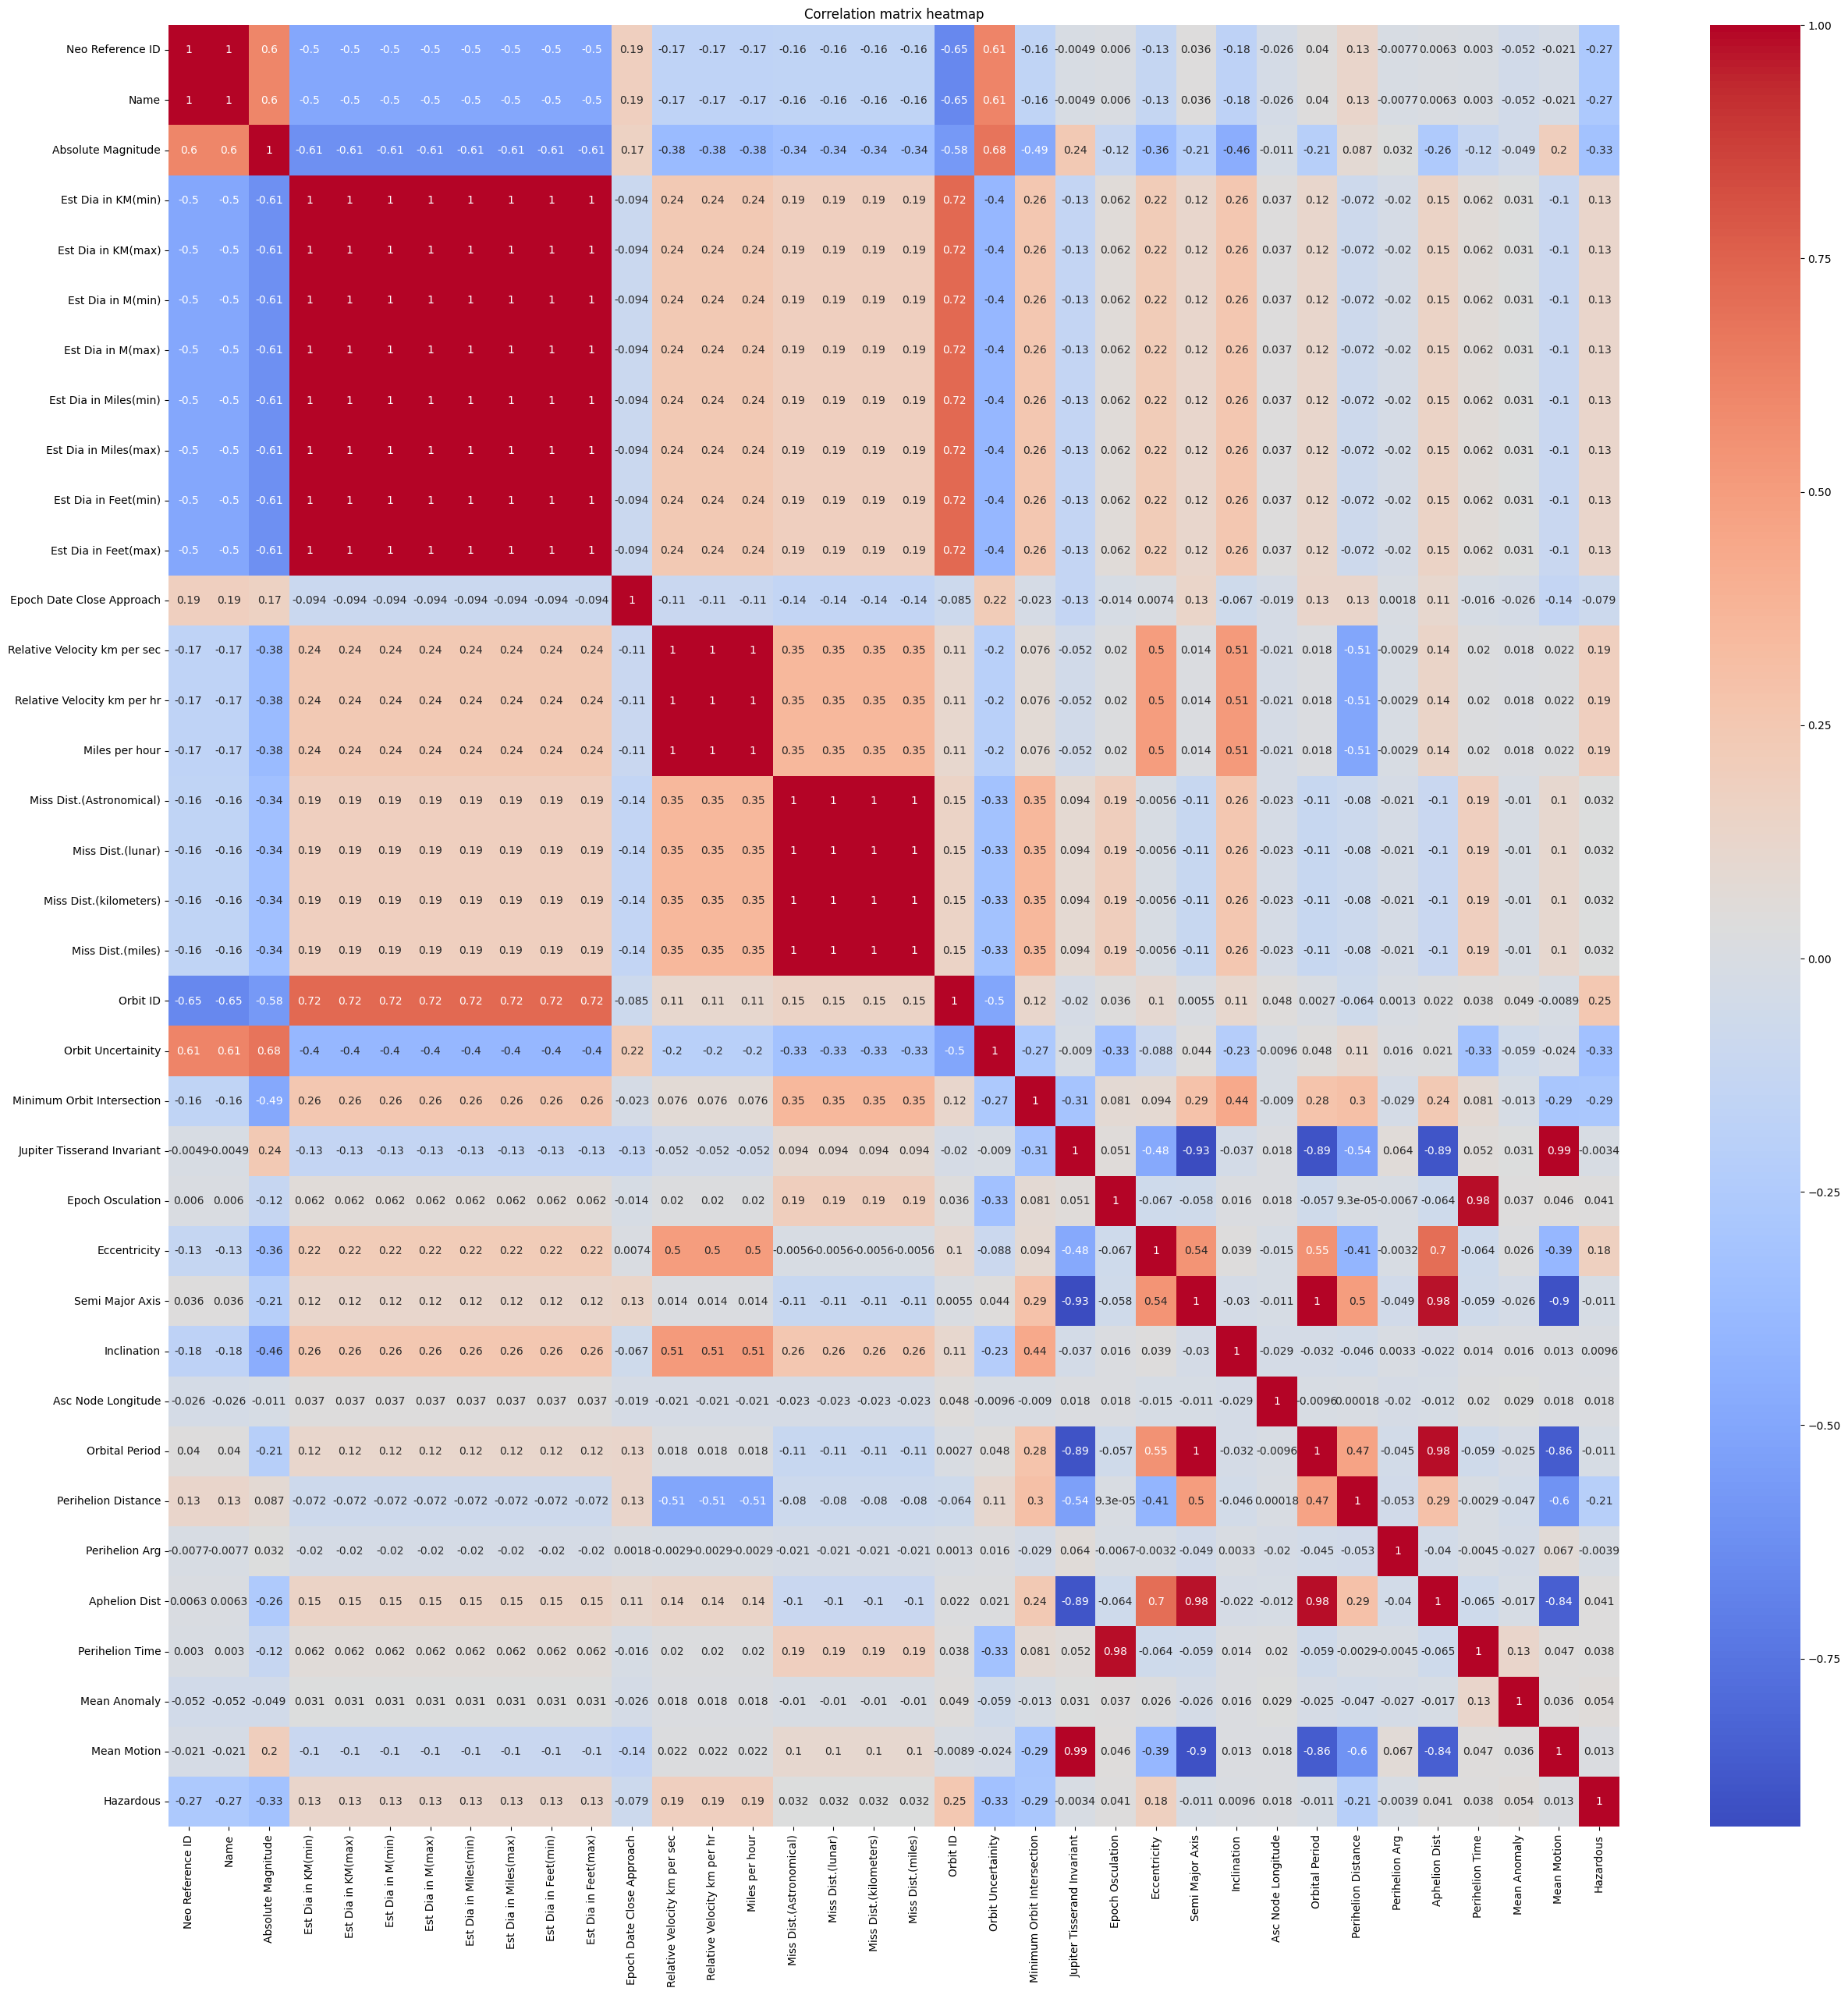

In [14]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation matrix heatmap')
plt.show()

After checking the heatmap, we can assure that there are some extra columns that can be dropped.
There are two reasons on why the following columns were dropped, values like ID or name contain no information that is useful for the data mining task, the other reason is that there are multiple values with metric units that not only have a correlation of 1, between each other, but are also a direct conversion.

In [15]:
df = df.drop(["Neo Reference ID","Name","Est Dia in KM(max)","Est Dia in M(min)","Est Dia in M(max)","Est Dia in Miles(min)",
            "Est Dia in Miles(max)","Est Dia in Feet(min)","Est Dia in Feet(max)",
            "Relative Velocity km per sec","Miles per hour","Miss Dist.(lunar)",
            "Miss Dist.(Astronomical)","Miss Dist.(miles)","Orbit Determination Date","Close Approach Date"], axis = 'columns')

df.shape

(4687, 22)

Now after dropping those columns the updated heatmap is as follows.

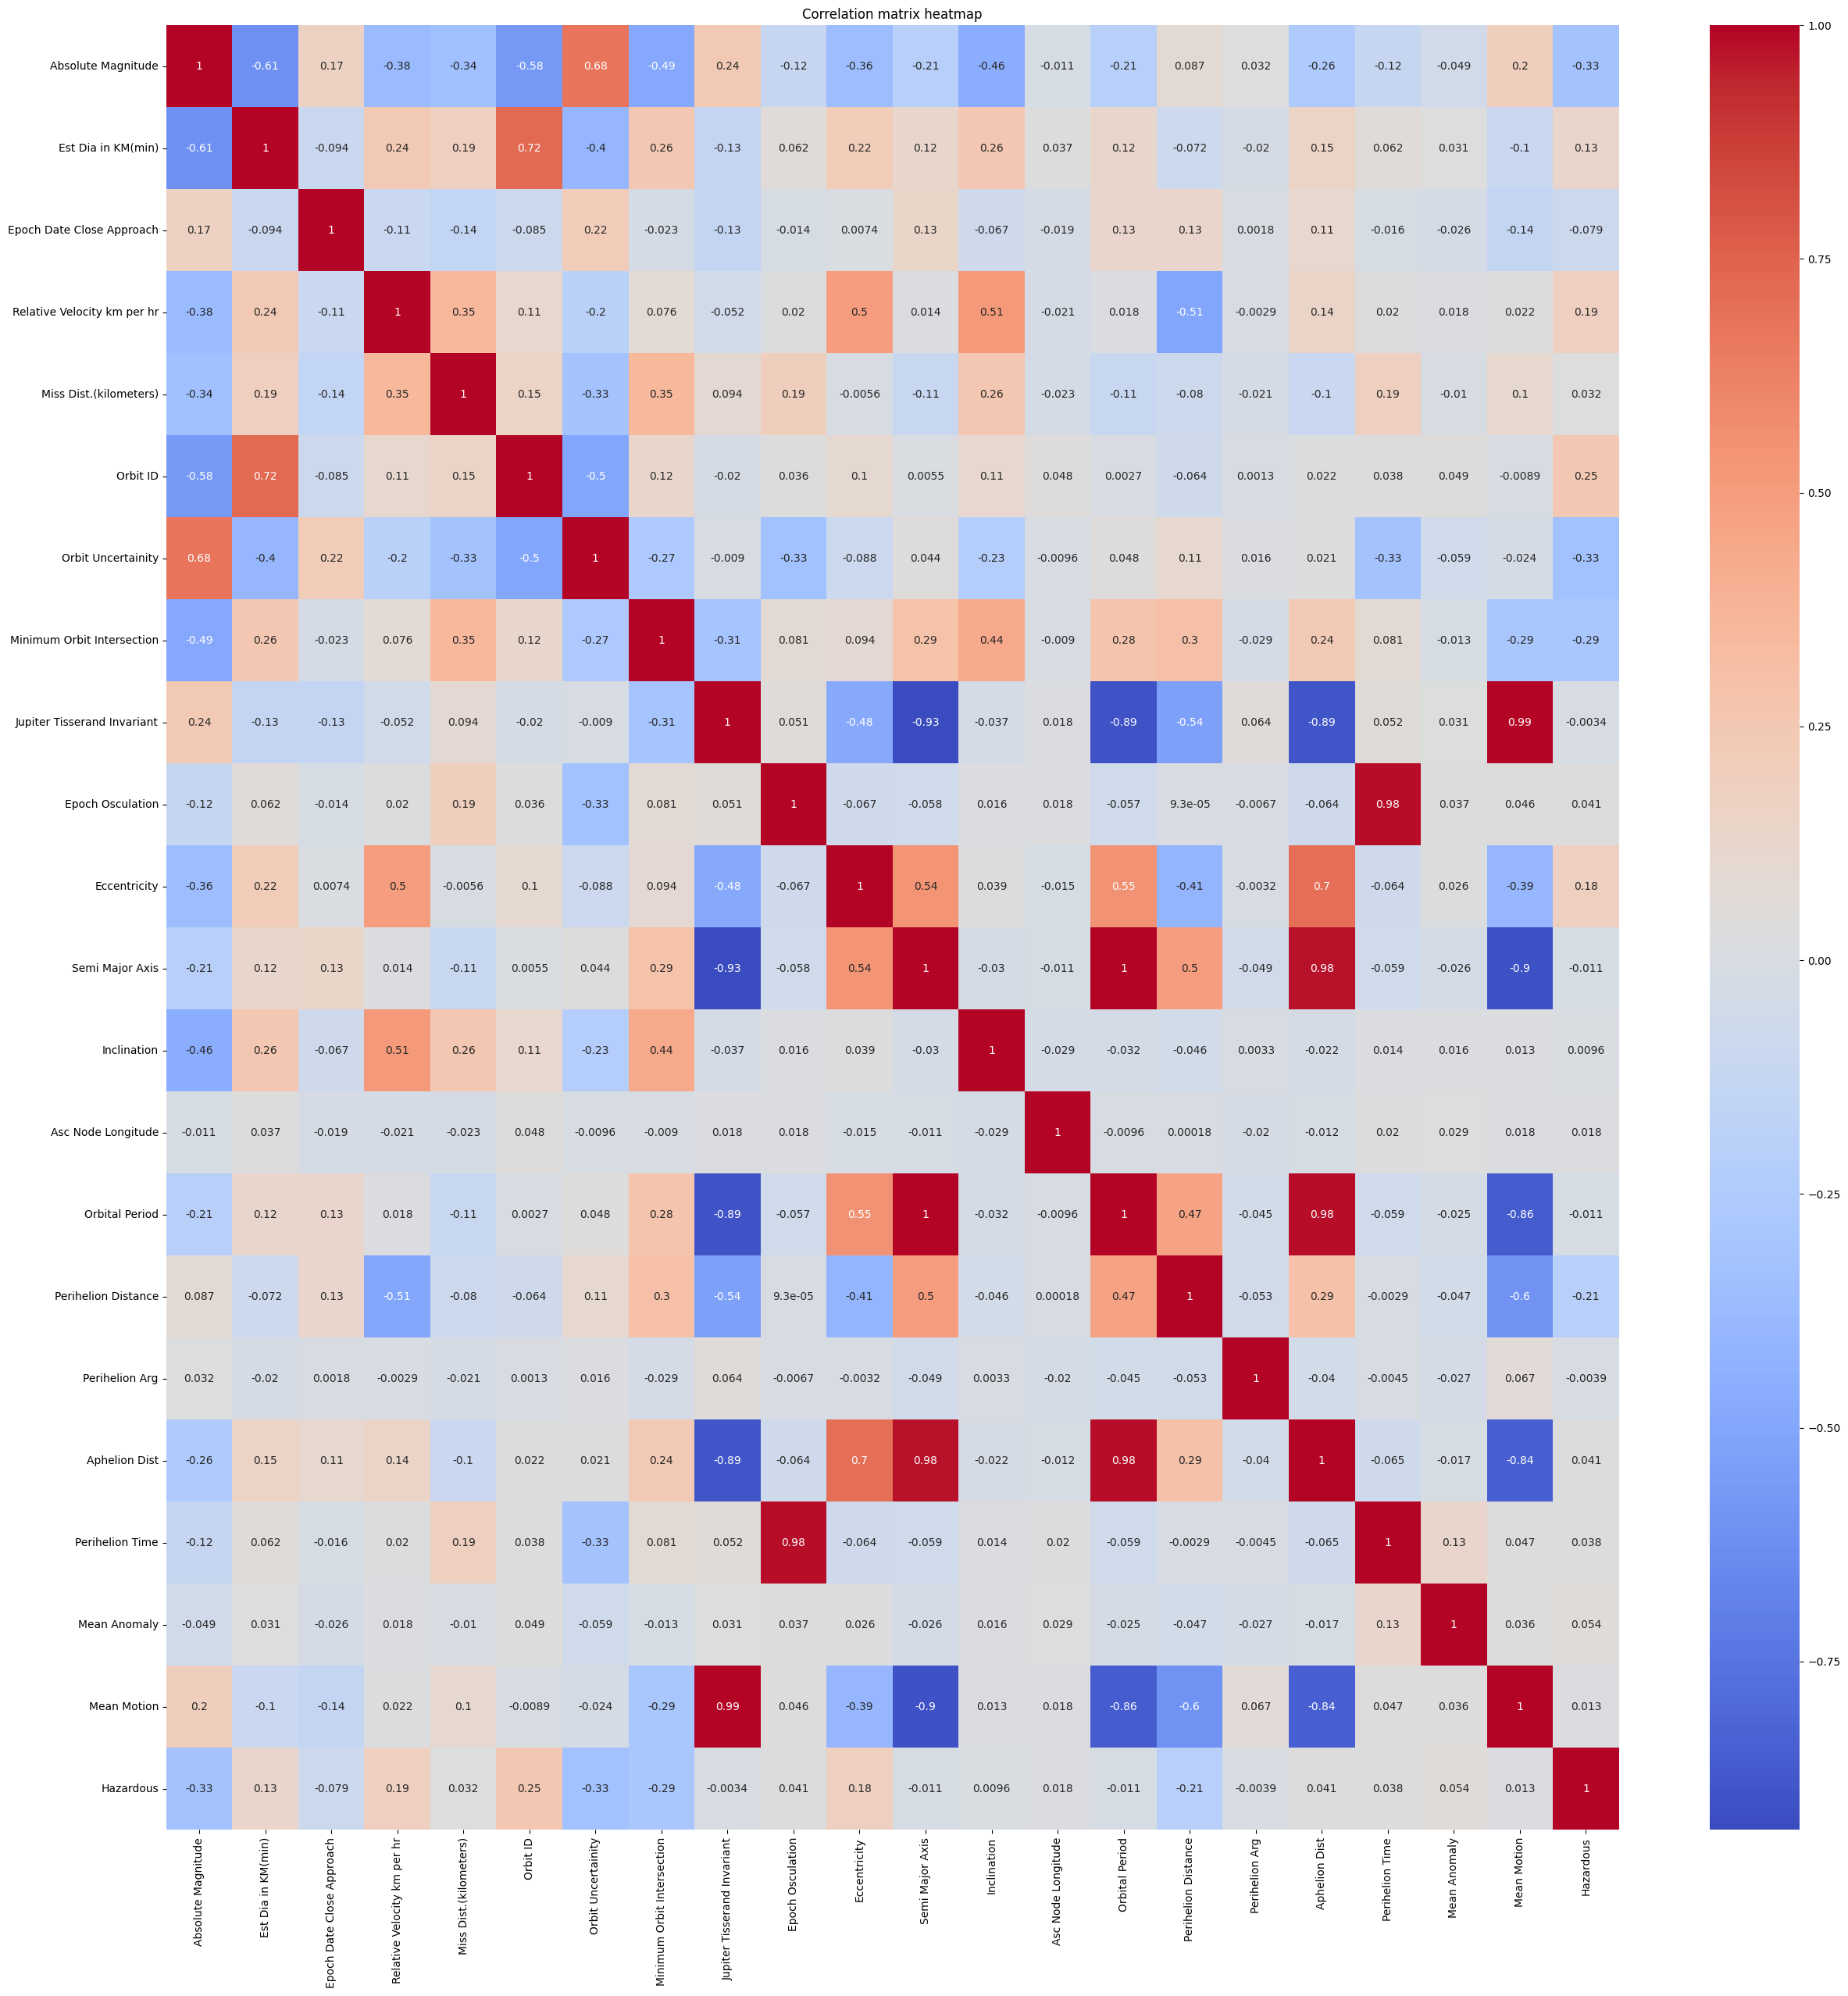

In [16]:
relevant_numeric_df = df.select_dtypes(include=[np.number])
corr = relevant_numeric_df.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation matrix heatmap')
plt.show()

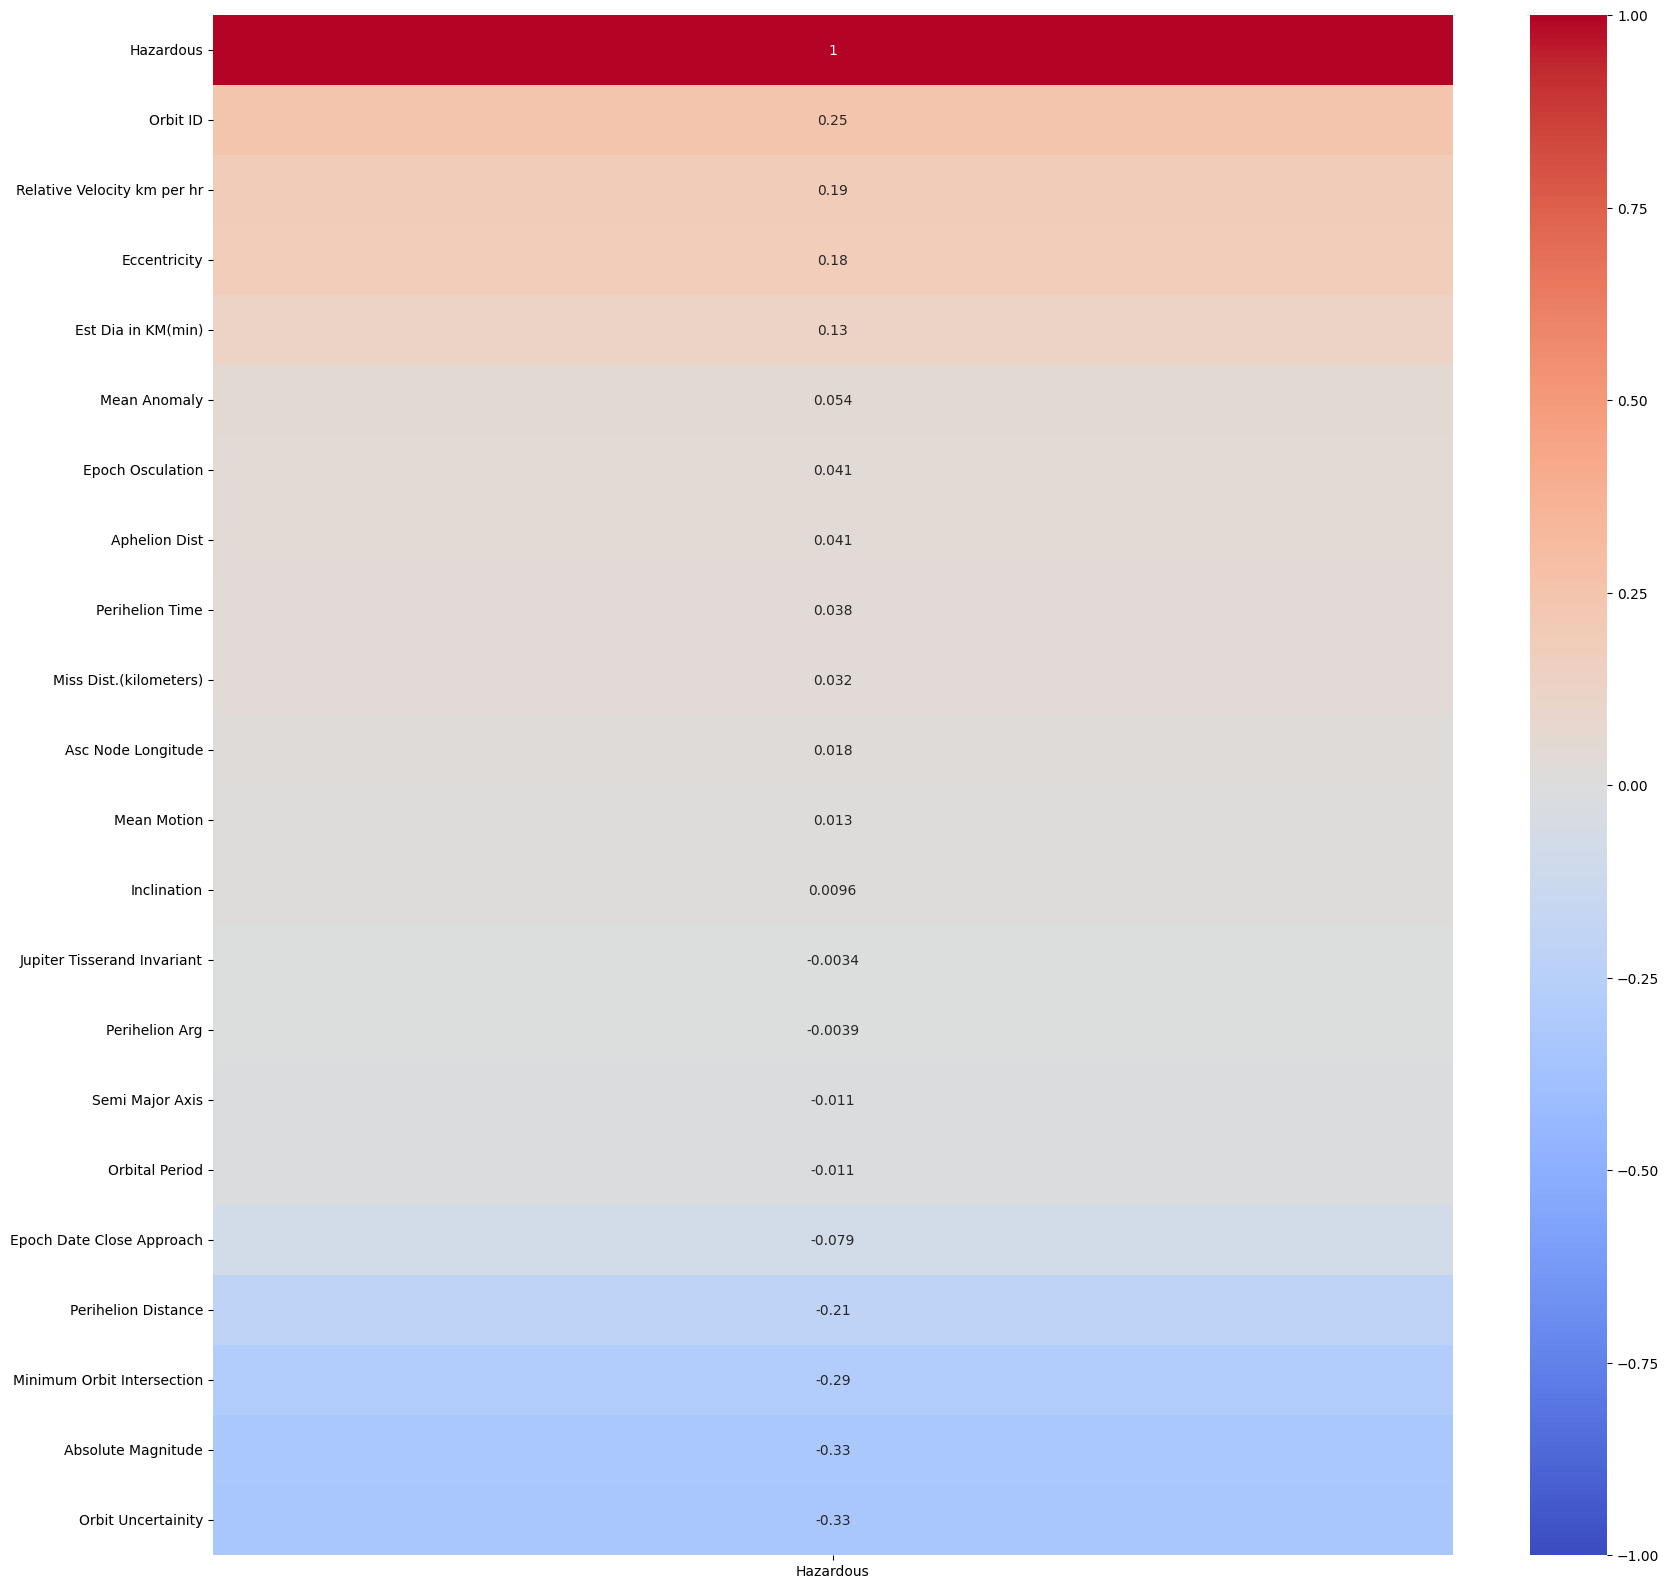

In [17]:
cols = list(relevant_numeric_df.columns)

plt.figure(figsize=(20,20))
corr = relevant_numeric_df.corr()[['Hazardous']].sort_values(by='Hazardous', ascending=False)
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

### Data Analysis

We will now proceed to analyze the data. First we will observe the correlation between every single feature to the target.

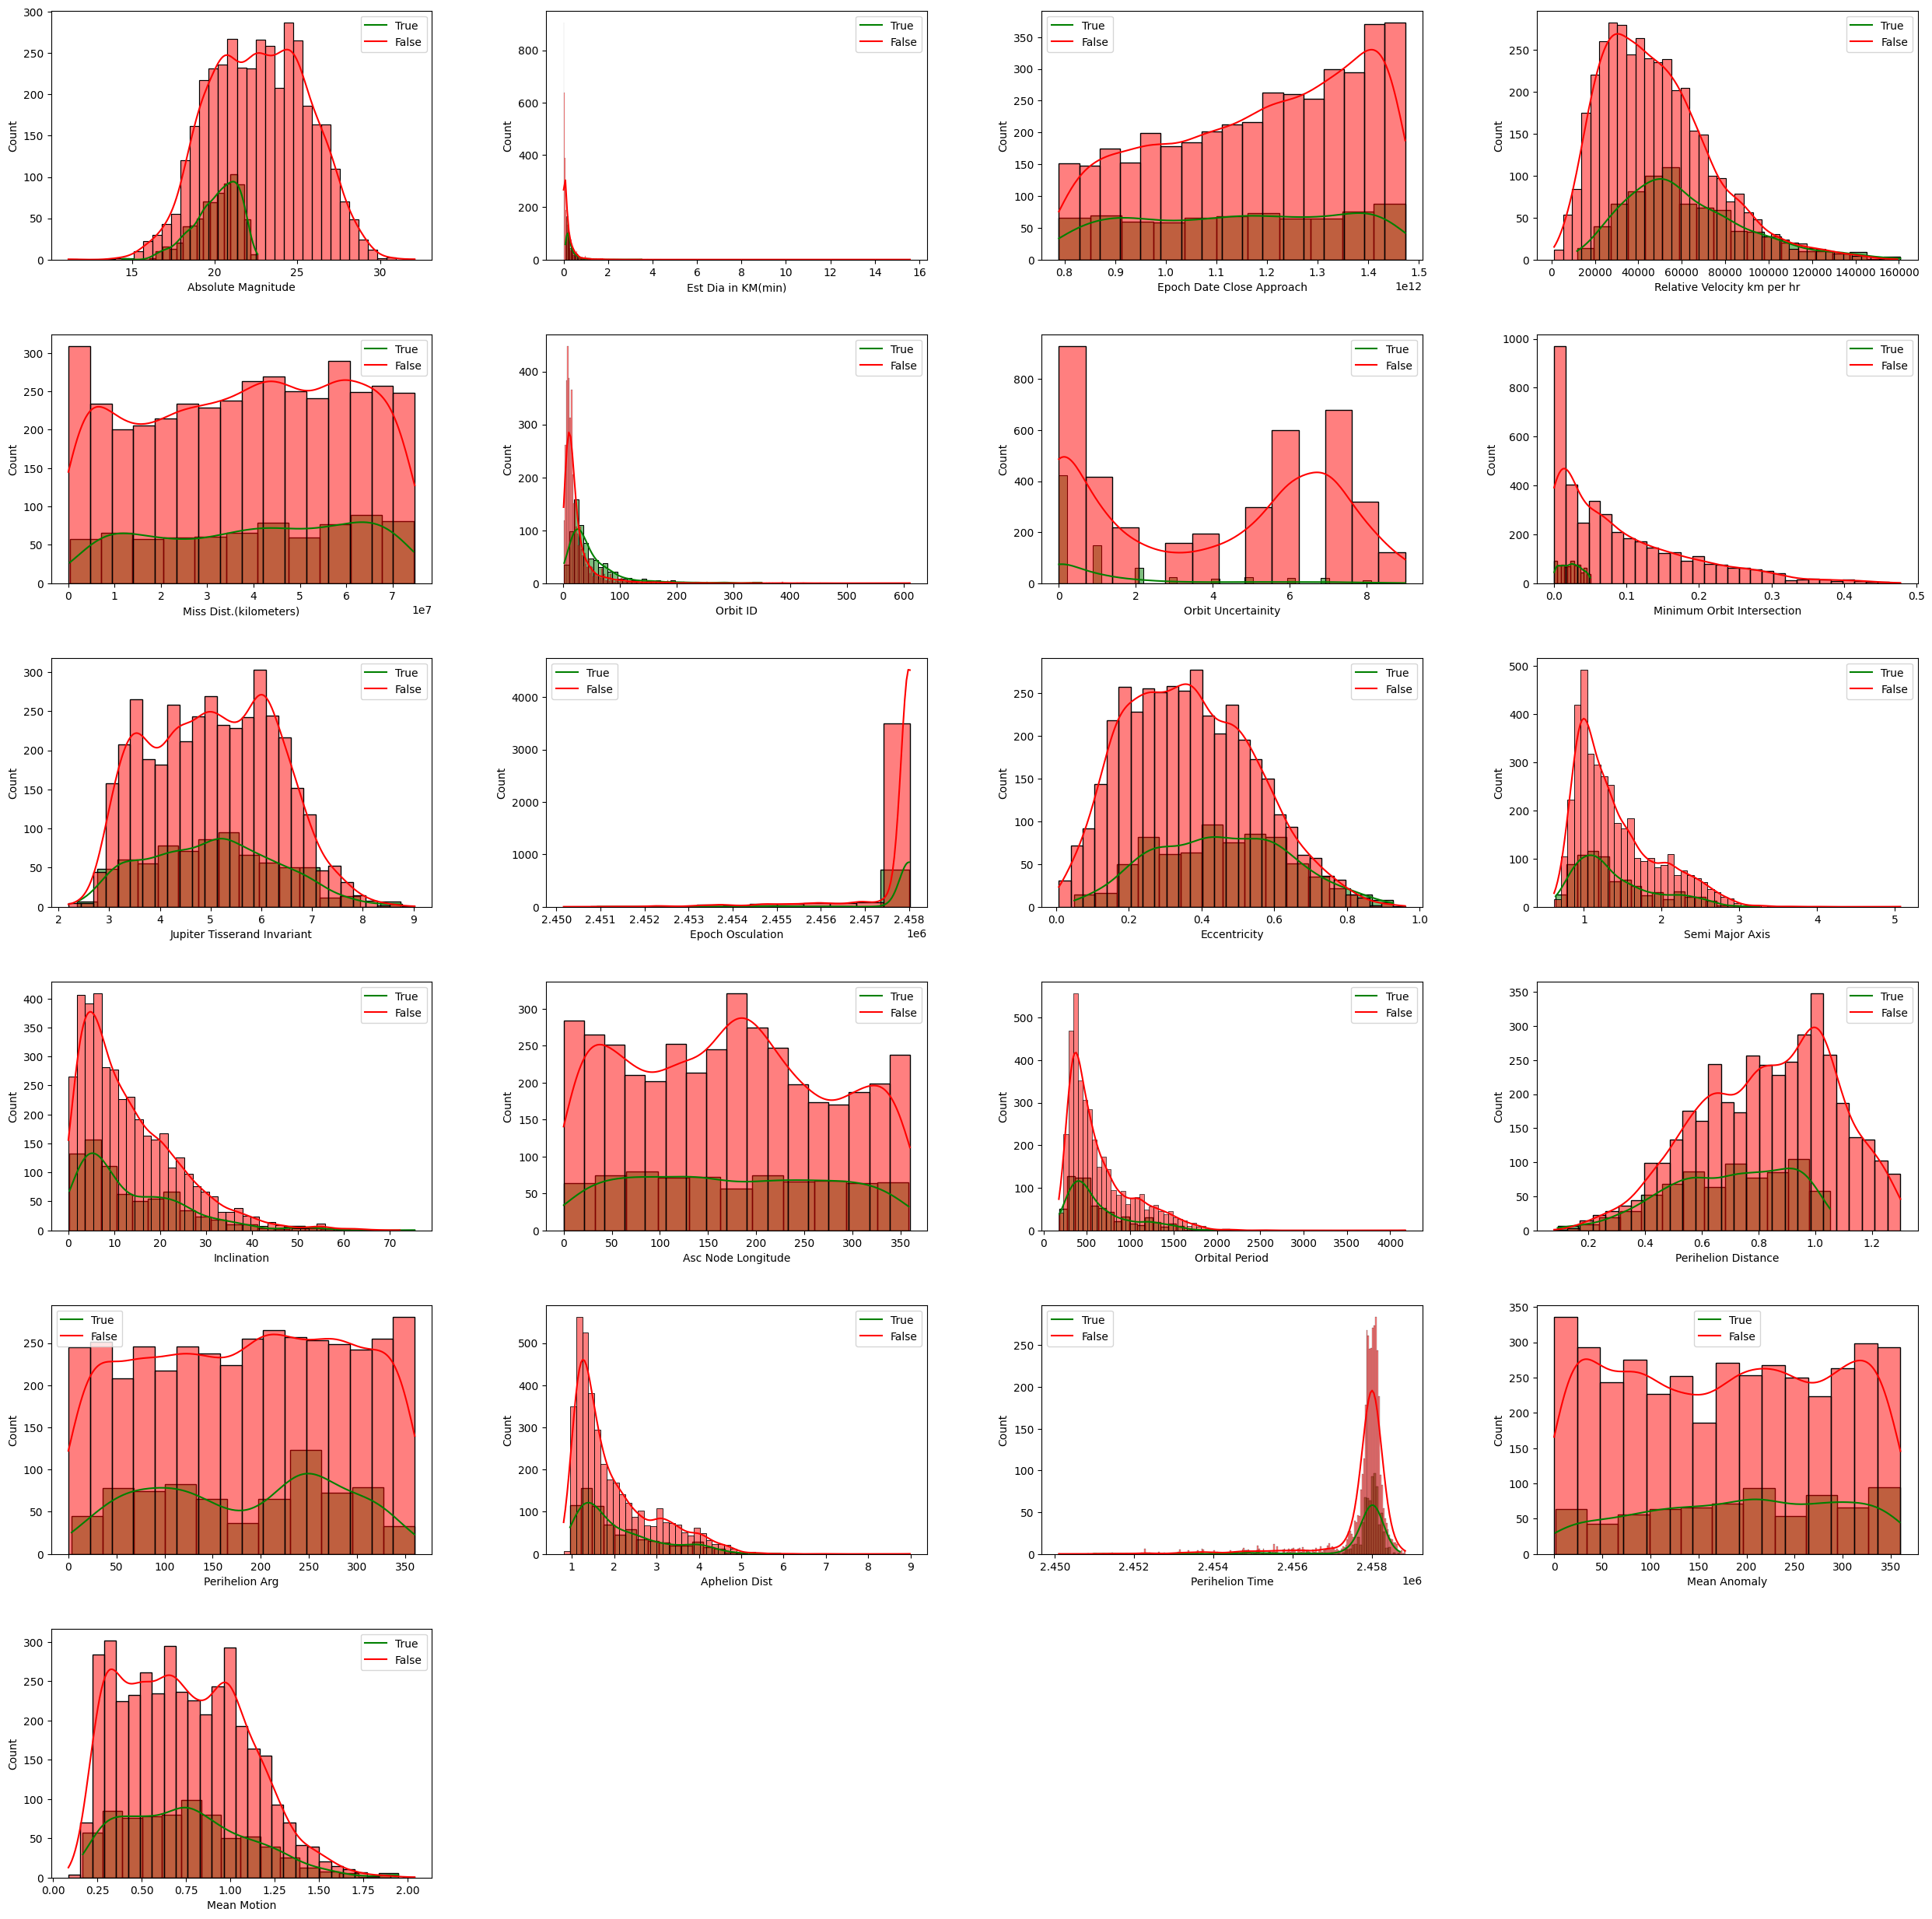

In [18]:
plt.figure(figsize=(30,30))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3)

df1 = df[df['Hazardous'] == 1].drop(['Hazardous'], axis=1)
df2 = df[df['Hazardous'] == 0].drop(['Hazardous'], axis=1)

cols = list(df1.columns)

for i, col in enumerate(cols):
    plt.subplot(6,4,i+1)
    sns.histplot(data=df1[col], color = 'green', label = 'True', kde = True)
    sns.histplot(data=df2[col], color = 'red', label = 'False', kde = True)
    _, axes = plt.gca().get_legend_handles_labels()
    plt.legend(axes, prop={'size': 10})

plt.show()

### Feature extraction

Using the correlation matrix once again, we will now focus on the attributes that have correlation equal or superior to 95% between themselves.

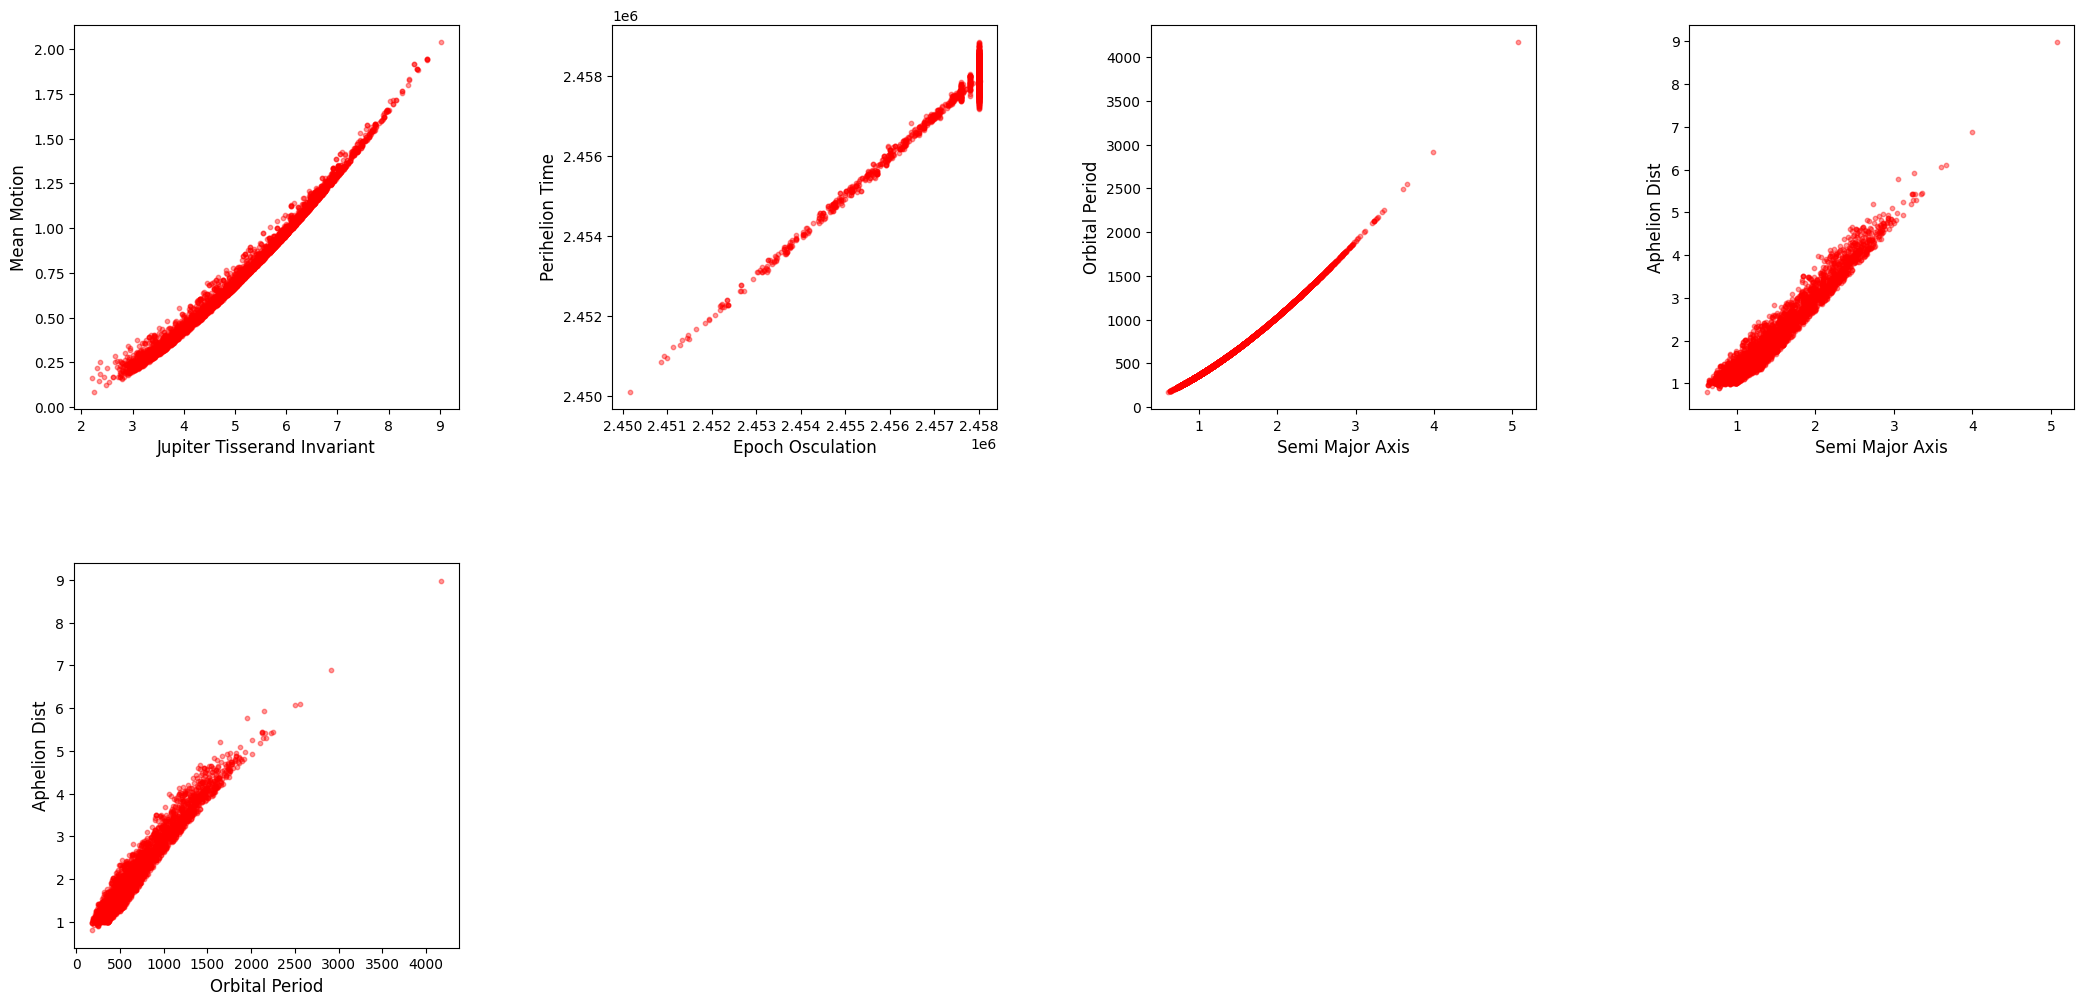

In [19]:
cols = list(relevant_numeric_df.columns)
plot_cols = []

for i, col1 in enumerate(cols):
    if col1 == 'Hazardous':
        continue
    for col2 in cols[i::]:
        if col1 == col2 or col2 == 'Hazardous':
            continue
        if math.fabs(df[col1].corr(df[col2])) > 0.95:
            plot_cols.append([col1,col2])

plt.figure(figsize=(25,25))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

for i, cols in enumerate(plot_cols):
    plt.subplot(4,4,i+1)
    plt.scatter(df[cols[0]],df[cols[1]],s=10,c='red',alpha=0.4)
    plt.xlabel(f"{cols[0]}",fontsize=12)
    plt.ylabel(f"{cols[1]}",fontsize=12)

As it is possible to observe from the graphics above there are still a few attributes highly correlated, so will try to reduce the number of highly correlated features between themselves.

In the case of the columns 'Aphelion Dist', 'Orbital Period' and 'Semi Major Axis', we will only keep one of those columns applying the Feature Selection approach, since those 3 columns are all highly correlated between themselves.

In the case of the columns 'Mean Motion', 'Jupiter Tisserand Invariant', 'Perihelion Time' and 'Epoch Osculation' we will simply apply the Feature Engineering approach.

In [20]:
df_extracted = relevant_numeric_df.copy()

df_extracted['Mean Motion/Jupiter Tisserand Invariant'] = df_extracted['Mean Motion']/df_extracted['Jupiter Tisserand Invariant']
df_extracted['Perihelion Time/Epoch Osculation'] = df_extracted['Perihelion Time']/df_extracted['Epoch Osculation']

cols_extracted = ['Orbital Period', 'Semi Major Axis', 'Mean Motion', 'Jupiter Tisserand Invariant', 'Perihelion Time', 'Epoch Osculation']
df_extracted = df_extracted.drop(cols_extracted, axis='columns')
df_extracted.head()

,Absolute Magnitude,Est Dia in KM(min),Epoch Date Close Approach,Relative Velocity km per hr,Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Eccentricity,Inclination,Asc Node Longitude,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Anomaly,Hazardous,Mean Motion/Jupiter Tisserand Invariant,Perihelion Time/Epoch Osculation
0,21.6,0.127220,788947200000,22017.003799,62753692.0,17,5,0.025282,0.425549,6.025981,314.373913,0.808259,57.257470,2.005764,264.837533,1,0.127439,1.000066
1,21.3,0.146068,788947200000,65210.346095,57298148.0,21,3,0.186935,0.351674,28.412996,136.717242,0.718200,313.091975,1.497352,173.741112,0,0.154907,0.999916
2,20.3,0.231502,789552000000,27326.560182,7622911.5,22,0,0.043058,0.348248,4.237961,259.475979,0.950791,248.415038,1.966857,292.893654,1,0.122750,1.000049
3,27.4,0.008801,790156800000,40225.948191,42683616.0,7,6,0.005512,0.216578,7.905894,57.173266,0.983902,18.707701,1.527904,68.741007,0,0.137498,0.999960
4,21.6,0.127220,790156800000,35426.991794,61010824.0,25,1,0.034798,0.210448,16.793382,84.629307,0.967687,158.263596,1.483543,135.142133,1,0.140938,0.999924


In [21]:
cols = list(df_extracted.columns)

high_corr_cols = 0

for i, col1 in enumerate(cols):
    for col2 in cols[i::]:
        if col1 == col2:
            continue
        if math.fabs(df_extracted[col1].corr(df_extracted[col2])) > 0.95:
            high_corr_cols += 1

print(f"Number of columns with high correlation: {high_corr_cols}")

Number of columns with high correlation: 0


Now to see the outliers of every value still in the dataset, the following commands are needed.

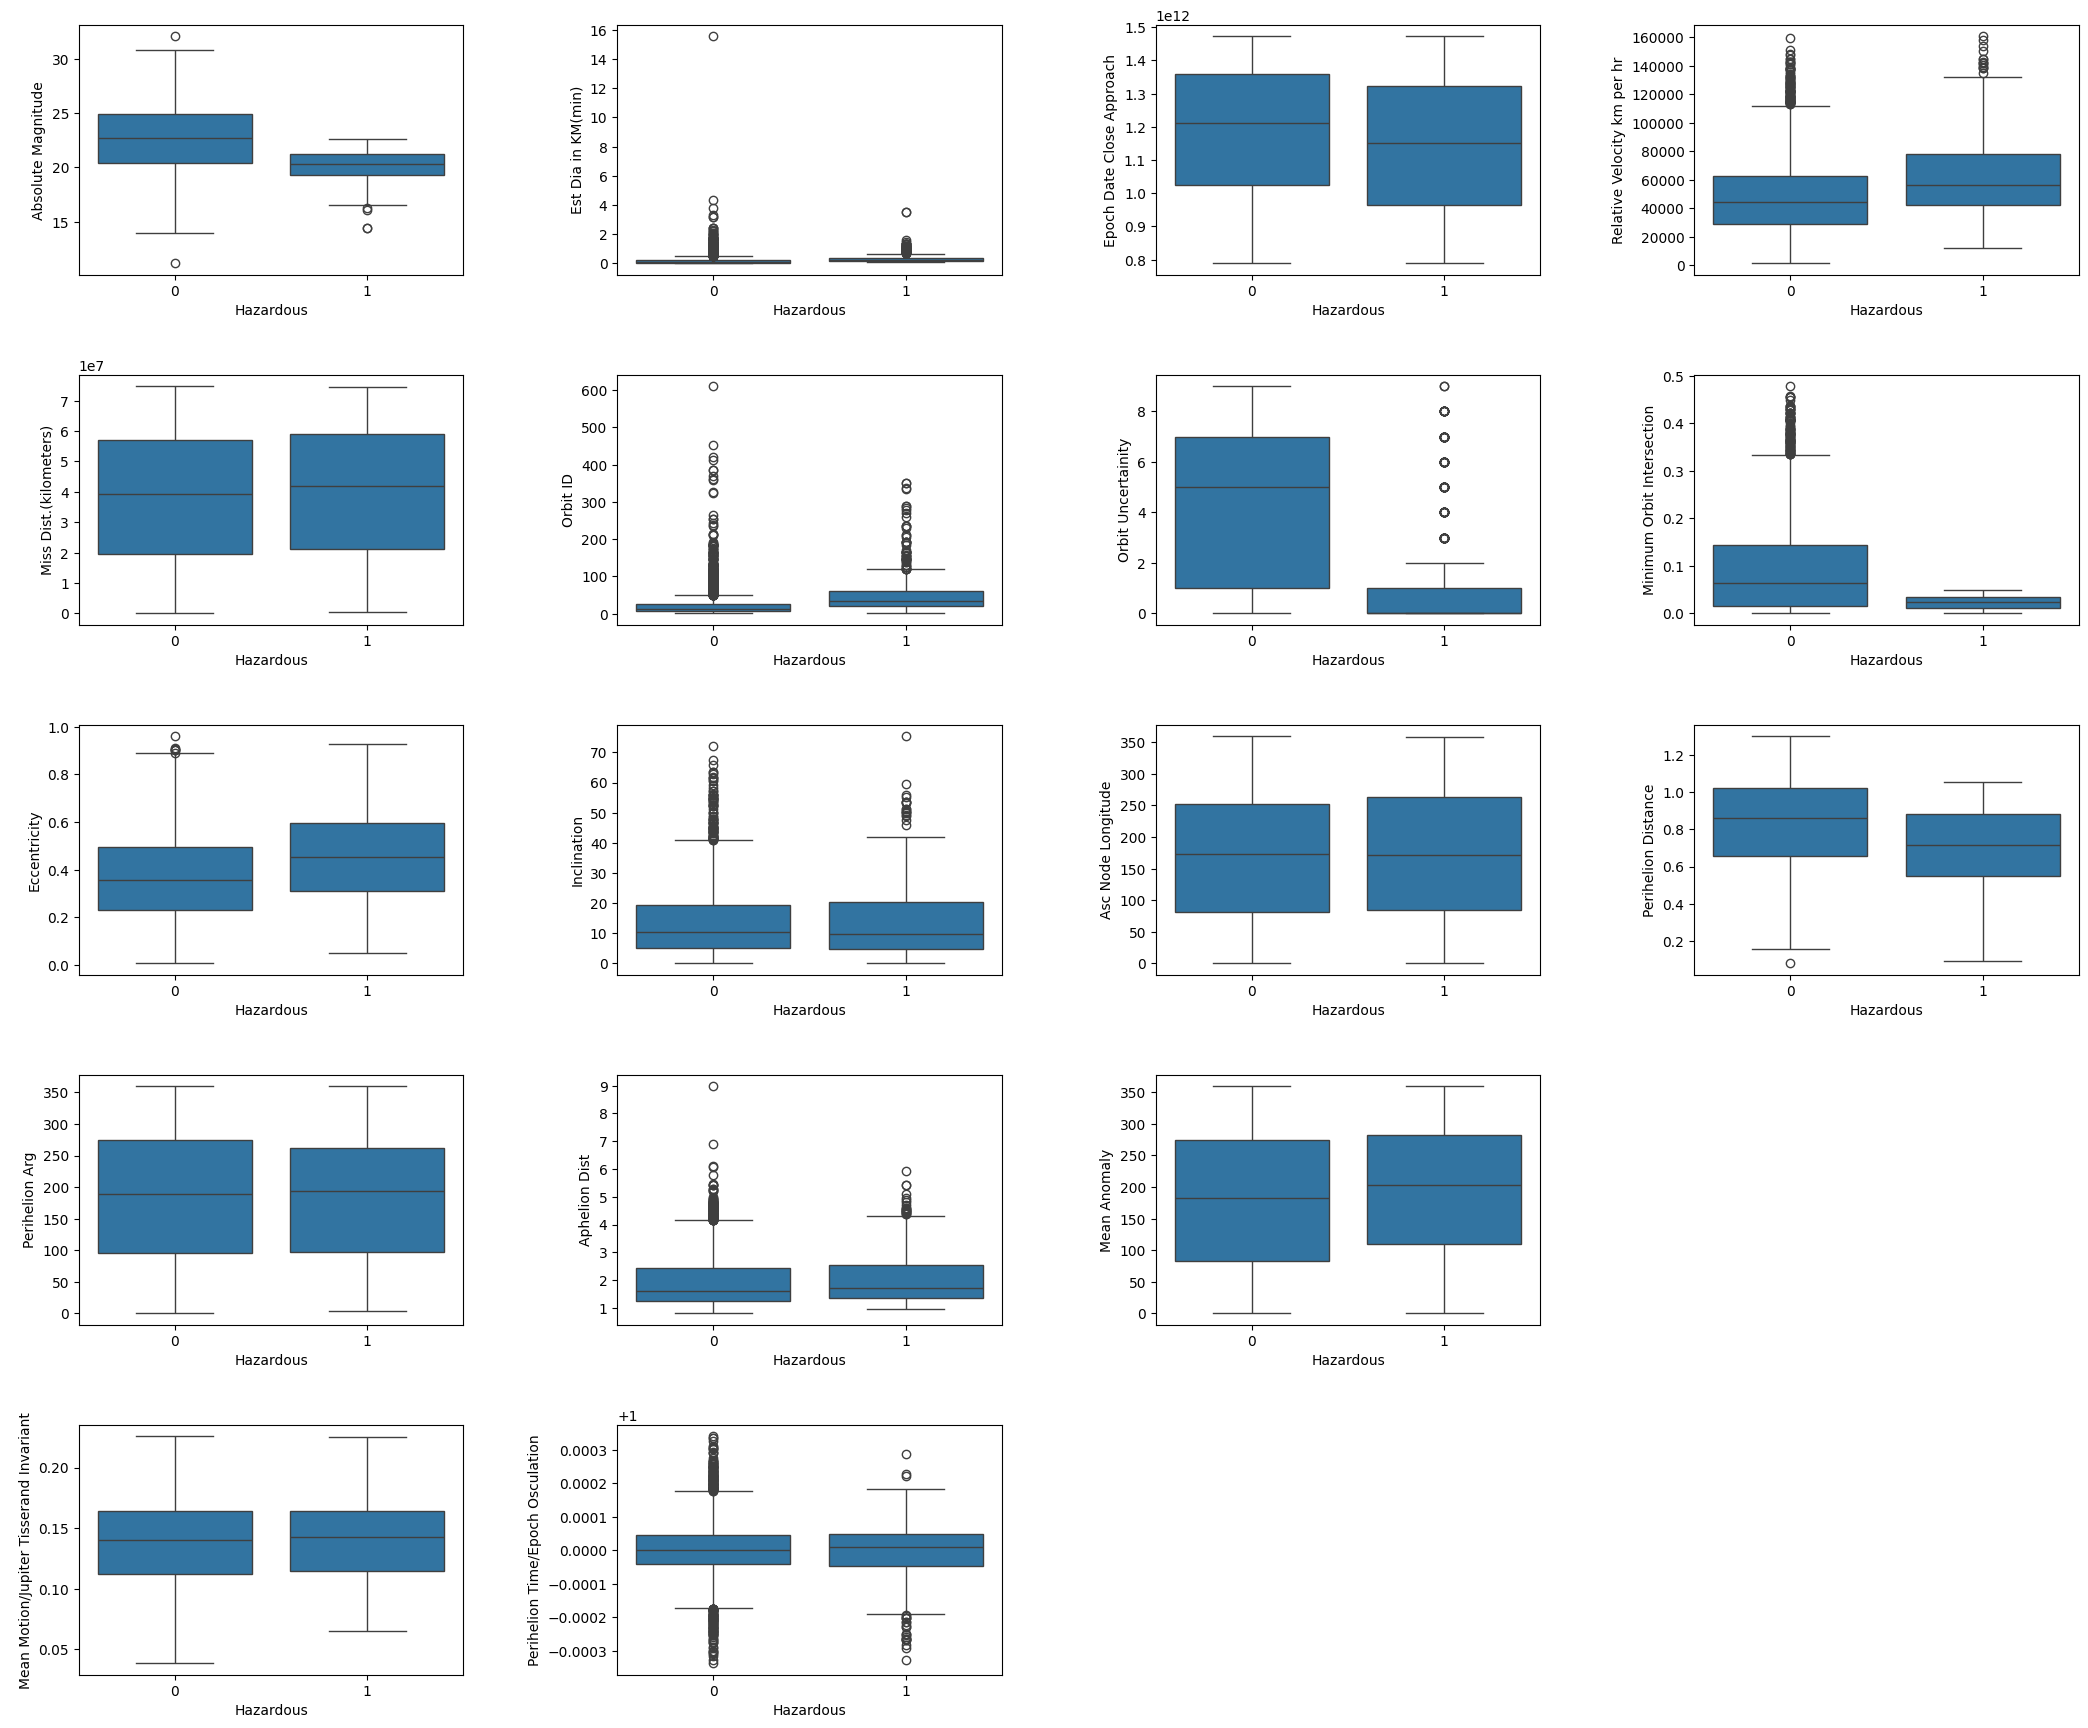

In [22]:
cols = list(df_extracted.columns)


plt.figure(figsize=(25, 25))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)



for i, col in enumerate(cols):
    if(col != 'Hazardous'):
        plt.subplot(6,4,i+1)
        sns.boxplot(data=df_extracted, y=col, x='Hazardous')

Looking at the graphs created we can conclude that there are some outliers for the following columns: 
- Absolute Magnitude;
- Orbital Period;
- Est Dia in KM(min);
- Semi Major Axis;
- Aphelion Dist;
- Inclination;
- Perihelion Time;

In order to deal with those outliers, we removed them with the following code. 

In [23]:
df_no_outliers = df_extracted[ 
                   (df_extracted['Absolute Magnitude'] <= 32) &
                   (df_extracted['Absolute Magnitude'] >= 12) &
                   (df_extracted['Est Dia in KM(min)'] <= 15) &
                   (df_extracted['Aphelion Dist'] <= 8) &
                   (df_extracted['Inclination'] < 70)]
df_no_outliers.reset_index(inplace=True, drop=True)

Here are the previous graphs, now without the outliers that we identified and considered more relevant to remove:

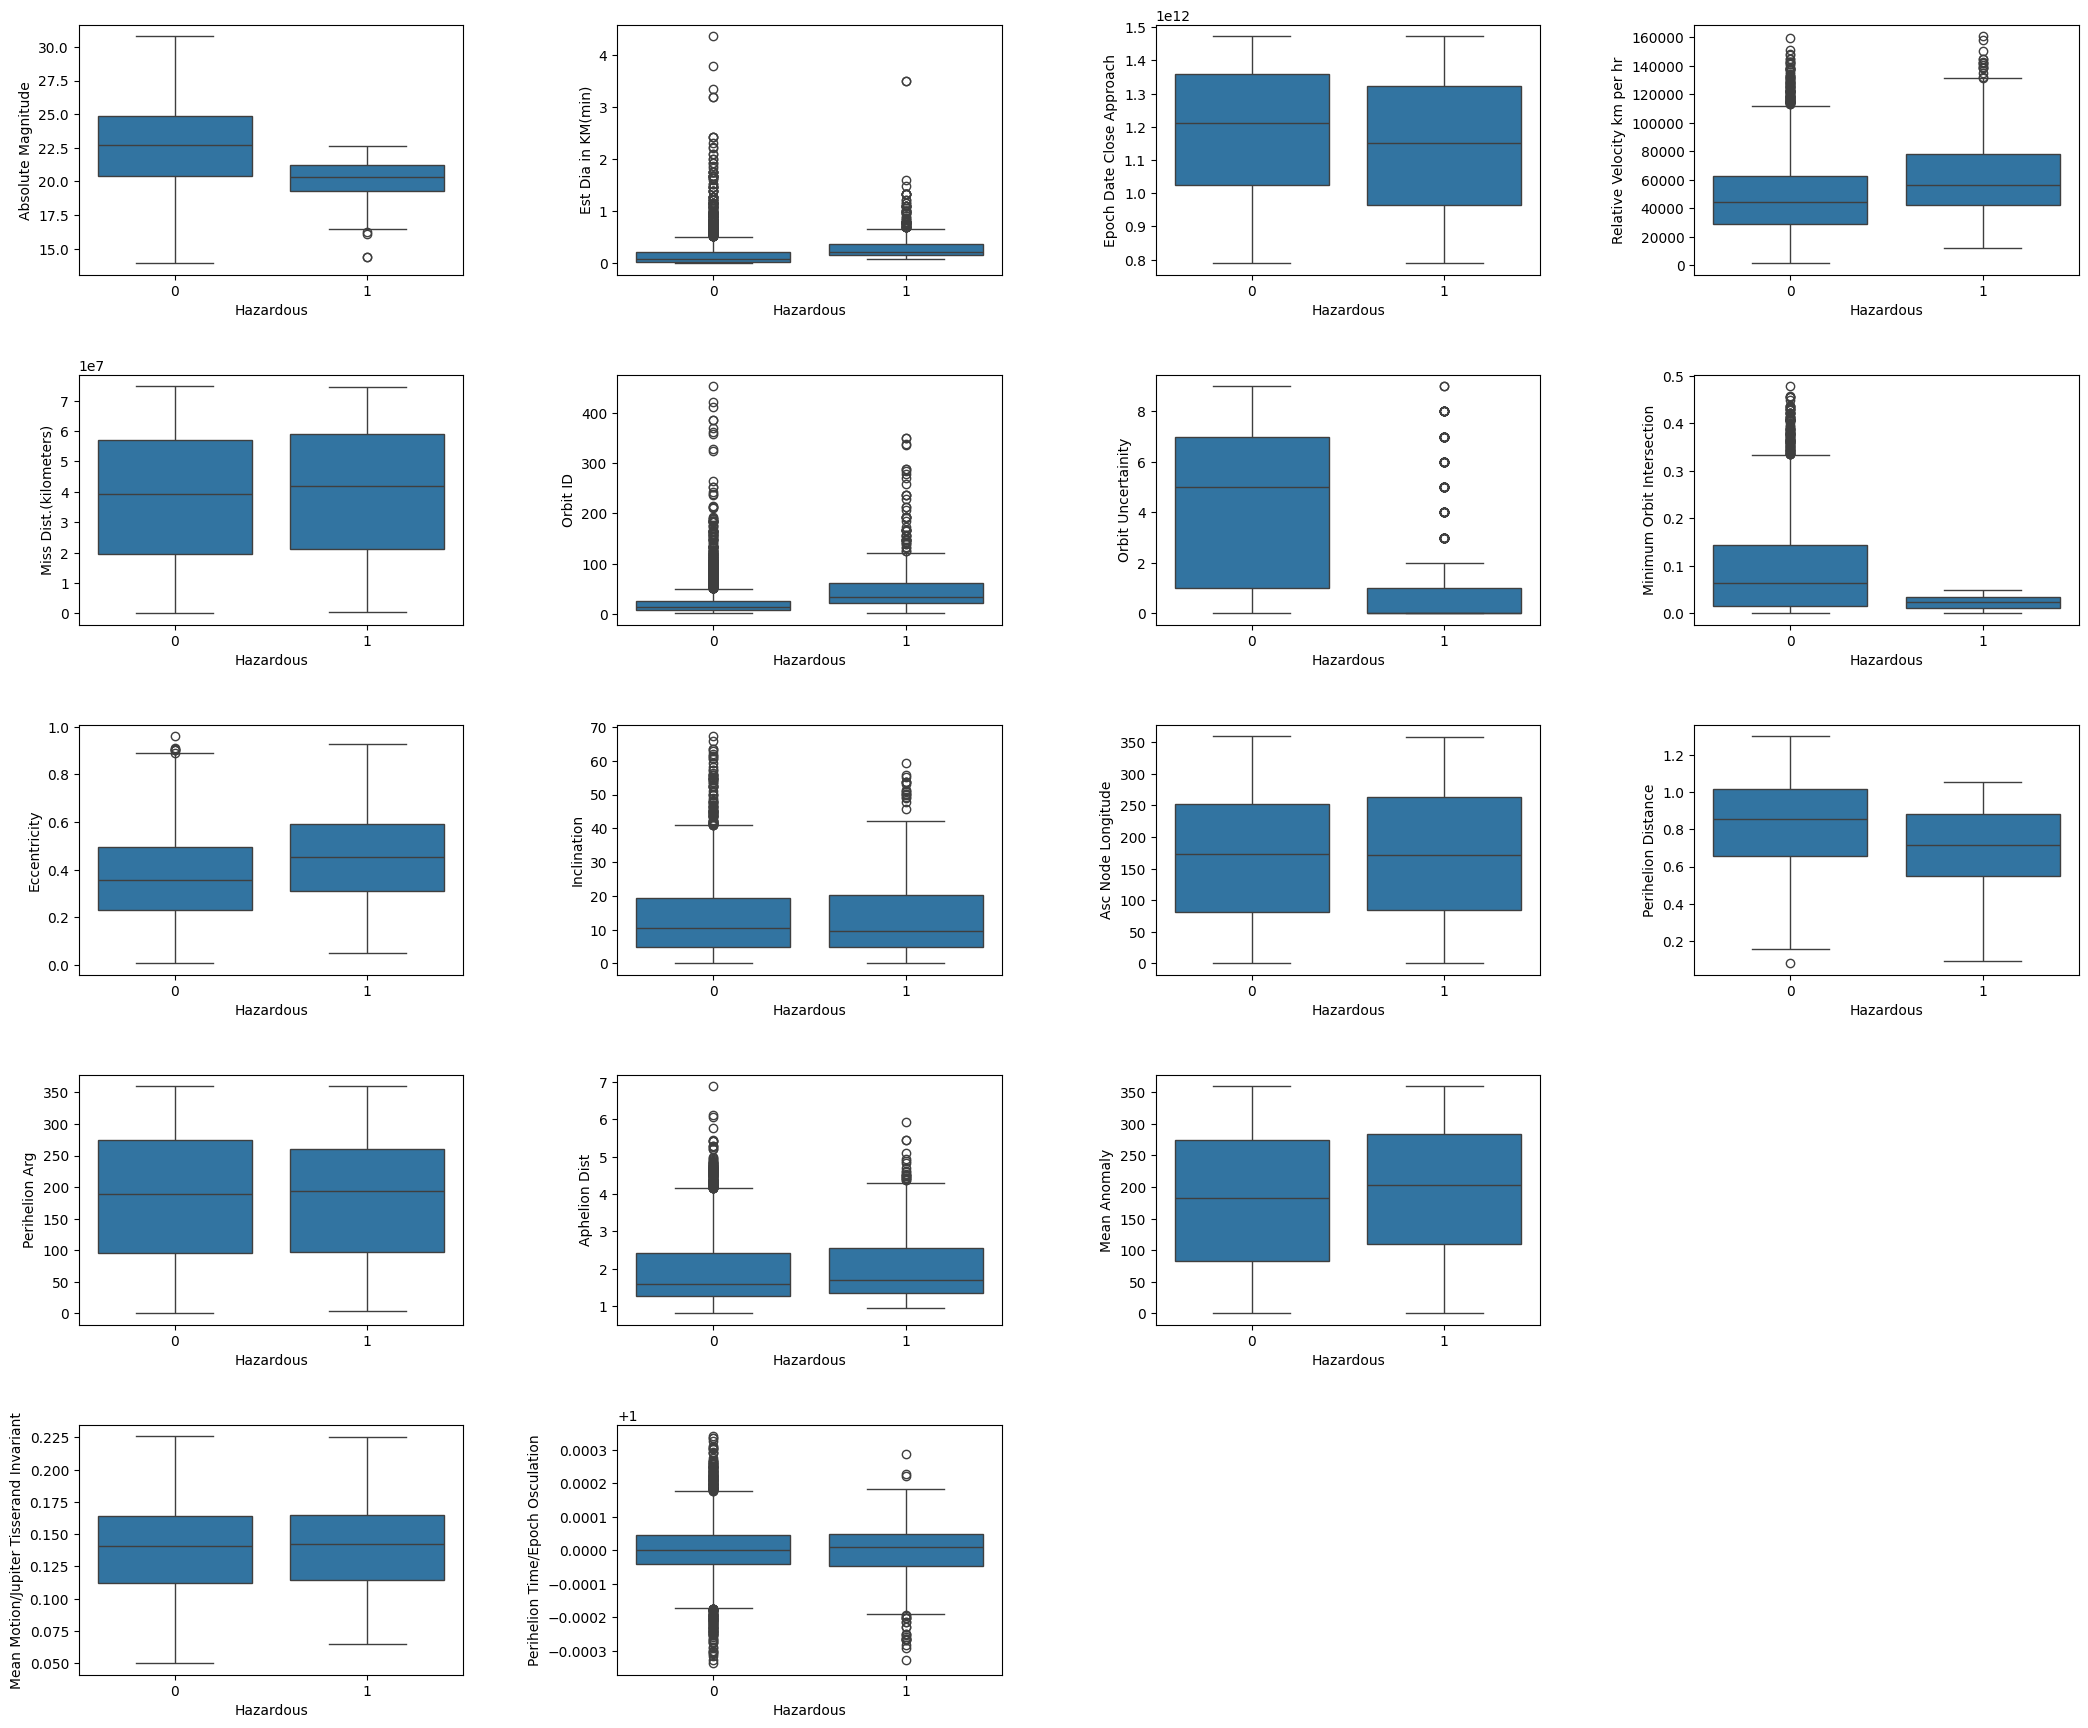

In [24]:
plt.figure(figsize=(25, 25))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)



for i, col in enumerate(list(df_no_outliers.columns)):
    if(col != 'Hazardous'):
        plt.subplot(6,4,i+1)
        sns.boxplot(data=df_no_outliers, y=col, x='Hazardous')

### Model Building

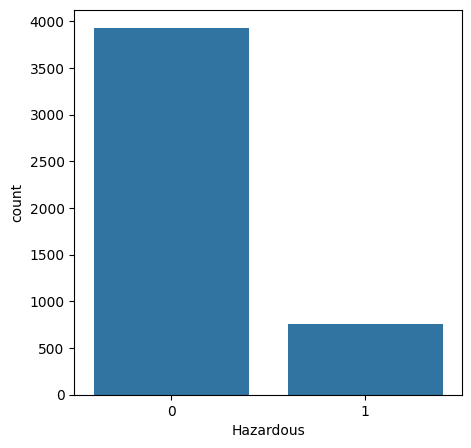

In [25]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df_no_outliers, x='Hazardous')
plt.show()

By observing the graph above, we can see that the dataset is very unbalanced, so we decided to take an approach (Stratified Sampling) to resample multiple times from the dataset, to make sure the train set has the same proportion of hazardous and non-hazardous instances of asteroids.

In [26]:
x = df_no_outliers.drop(['Hazardous'], axis=1)
y = df_no_outliers['Hazardous']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)
x_train, y_train = SMOTE(random_state=42).fit_resample(x_train, y_train)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Hazardous
0    0.5
1    0.5
Name: proportion, dtype: float64
Hazardous
0    0.838847
1    0.161153
Name: proportion, dtype: float64


#### Model Training

We will run the models we chose and afterwards compare them to conclude which of the models is best.

                  Model  Accuracy  Precision    Recall  F1 score       AUC
0         Decision Tree  0.997930   0.998725  0.997136  0.997930  0.997931
1                   SVM  0.548697   0.544374  0.597390  0.569651  0.548695
2                   KNN  0.710376   0.728562  0.670592  0.698376  0.710376
3   Logistic Regression  0.513373   0.514841  0.463717  0.487944  0.513367
4         Random Forest  0.998249   0.998725  0.997136  0.997930  0.997931
5                   MLP  0.492993   0.511341  0.408975  0.454465  0.509071
6           Naive Bayes  0.560636   0.562398  0.546467  0.554318  0.560630
7               Bagging  0.997771   0.998089  0.997454  0.997771  0.997772
8           Extra Trees  0.994750   0.993034  0.998090  0.995556  0.995544
9     Gradient Boosting  0.997931   0.997773  0.998090  0.997932  0.997931
10              XGBoost  0.998727   0.998410  0.999045  0.998727  0.998727
11            Linear DA  0.912480   0.854486  0.994271  0.919094  0.912476
12         Quadratic DA  

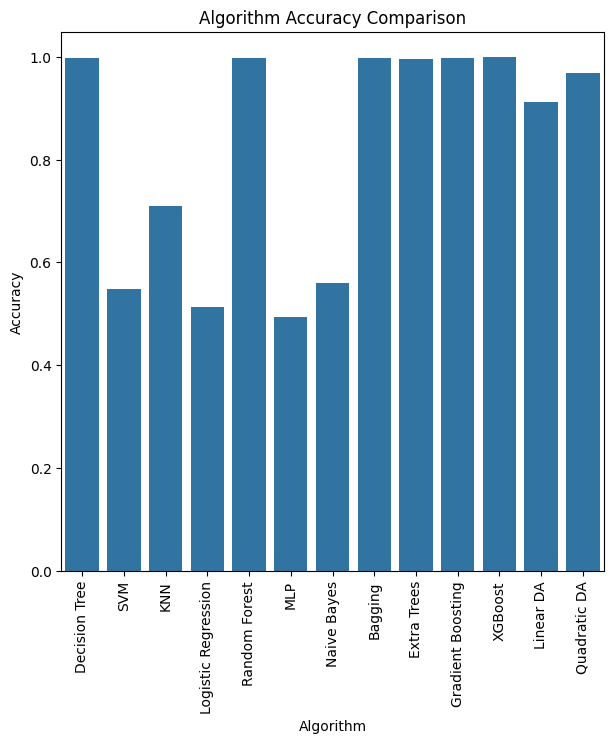

In [27]:
models = []
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Bagging', BaggingClassifier()))
models.append(('Extra Trees', ExtraTreesClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('XGBoost', XGBClassifier()))
models.append(('Linear DA', LinearDiscriminantAnalysis()))
models.append(('Quadratic DA', QuadraticDiscriminantAnalysis()))

metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 score': [],
    'AUC': []
}

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    y_pred = cross_val_predict(model, x_train, y_train, cv=kfold)

    metrics['Model'].append(name)
    metrics['Accuracy'].append(cross_val_score(model, x_train, y_train, cv=kfold).mean())
    metrics['Precision'].append(precision_score(y_train, y_pred))
    metrics['Recall'].append(recall_score(y_train, y_pred))
    metrics['F1 score'].append(f1_score(y_train, y_pred))
    metrics['AUC'].append(roc_auc_score(y_train, y_pred))


# display metrics as a table
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# plot accuracy of models
plt.figure(figsize=(7, 7))
sns.barplot(data=metrics_df, x='Model', y='Accuracy')
plt.xticks(rotation=90)
plt.title('Algorithm Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.show()


From the table and graph above we could conclude that the the best model is the 'XGBoost', since it's the one with the highest accuracy among all of them.

We will now proceed to train the model and plot the confusion matrix:

In [28]:
best_model = XGBClassifier(random_state=42)
best_model.fit(x_train, y_train)

best_model.score(x_train, y_train)

1.0

In [29]:
best_model.score(x_test, y_test)

0.9957310565635006

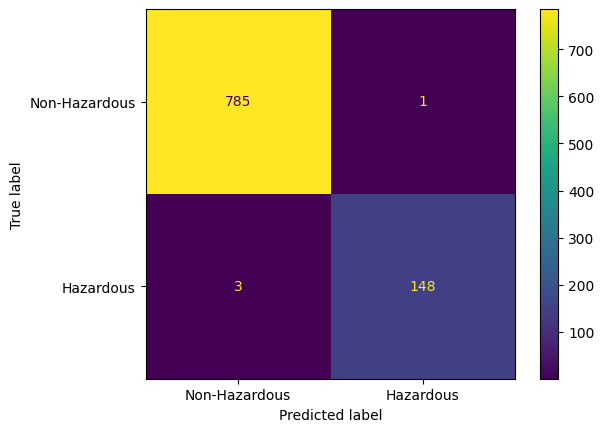

In [30]:
y_pred = best_model.predict(x_test)

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=["Non-Hazardous", "Hazardous"]).plot()
plt.show()